## Model learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras import regularizers
# Import mlcompute module to use the optional set_mlc_device API for device selection with ML Compute.
from tensorflow.python.compiler.mlcompute import mlcompute

In [2]:
# Select GPU device.
mlcompute.set_mlc_device(device_name='any') # Available options are 'cpu', 'gpu', and ‘any'.

In [3]:
X_train, X_test, Y_train, Y_test = np.load('../data/book_data_max_179_wordsize_123913.npy', allow_pickle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(32788, 179)
(8198, 179)
(32788, 12)
(8198, 12)


In [4]:
model_LSTM_dict = {
    'E':100, 
    'C':[16,5], 
    'M':1, 
    'L1':128, 
    'DO1':0.5, 
#     'L2':64, 
#     'DO2':0.3, 
#     'L3':64, 
#     'DO3':0.5, 
}
model_Dense_dict = {
    'D1':256,
    'DO1':0.5,
    'D2':128,
    'DO2':0.5,
    'D3':64,
    'DO3':0.1,
    'D4':12
}

model = Sequential()
model.add(Embedding(123913, model_LSTM_dict['E'], input_length=179)) 
model.add(Conv1D(model_LSTM_dict['C'][0], kernel_size=model_LSTM_dict['C'][1], padding='same', activation='relu'))
model.add(MaxPool1D(pool_size=model_LSTM_dict['M']))
model.add(LSTM(model_LSTM_dict['L1'], activation='tanh'))#, return_sequences=True))  
model.add(Dropout(model_LSTM_dict['DO1']))
# model.add(LSTM(model_LSTM_dict['L2'], activation='tanh', return_sequences=True))  
# model.add(Dropout(model_LSTM_dict['DO2']))
# model.add(LSTM(model_LSTM_dict['L3'], activation='tanh')) 
# model.add(Dropout(model_LSTM_dict['DO3']))
model.add(Flatten())
model.add(Dense(model_Dense_dict['D1'], activation='relu'))
model.add(Dropout(model_Dense_dict['DO1']))
model.add(Dense(model_Dense_dict['D2'], activation='relu'))
model.add(Dropout(model_Dense_dict['DO2']))
model.add(Dense(model_Dense_dict['D3'], activation='relu'))
model.add(Dropout(model_Dense_dict['DO3']))
model.add(Dense(model_Dense_dict['D4'], activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 179, 100)          12391300  
_________________________________________________________________
conv1d (Conv1D)              (None, 179, 16)           8016      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 179, 16)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               74240     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               3

In [5]:
# early_stopping = tf.keras.callbacks.EarlyStopping(moniter='val_accuracy', patience=5)
fit_dict = {
    'B':2048,
    'E':50
}
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
fit_hist = model.fit(X_train, Y_train, 
                     batch_size=fit_dict['B'], 
                     epochs=fit_dict['E'], 
                     validation_data=(X_test, Y_test))


Epoch 1/50
65/65 [==============================] - 48s 728ms/step - loss: 2.4209 - accuracy: 0.1321 - val_loss: 2.0401 - val_accuracy: 0.2296
Epoch 2/50
65/65 [==============================] - 47s 716ms/step - loss: 1.9023 - accuracy: 0.2933 - val_loss: 1.5403 - val_accuracy: 0.4244
Epoch 3/50
65/65 [==============================] - 47s 716ms/step - loss: 1.3820 - accuracy: 0.4764 - val_loss: 2.7127 - val_accuracy: 0.4727
Epoch 4/50
65/65 [==============================] - 47s 717ms/step - loss: 1.3200 - accuracy: 0.5375 - val_loss: 1.5647 - val_accuracy: 0.5079
Epoch 5/50
65/65 [==============================] - 47s 720ms/step - loss: 1.0350 - accuracy: 0.6203 - val_loss: 1.3610 - val_accuracy: 0.5865
Epoch 6/50
65/65 [==============================] - 47s 723ms/step - loss: 0.7451 - accuracy: 0.7328 - val_loss: 1.4278 - val_accuracy: 0.6139
Epoch 7/50
65/65 [==============================] - 47s 723ms/step - loss: 0.5692 - accuracy: 0.8026 - val_loss: 1.5084 - val_accuracy: 0.6189

In [6]:
name = []
for k,v in model_LSTM_dict.items():
    name.append(k)
    if str(type(v)) == "<class 'list'>":
        for n in v:
            name.append(str(n))
    else:
        name.append(str(v))

for k,v in model_Dense_dict.items():
    name.append(k)
    name.append(str(v))

for k,v in fit_dict.items():
    name.append(k)
    name.append(str(v))
    
file_name = '_'.join(name)
print(file_name)

E_100_C_16_5_M_1_L1_128_DO1_0.5_D1_256_DO1_0.5_D2_128_DO2_0.2_D3_64_DO3_0.1_D4_12_B_512_E_50


In [7]:
score = model.evaluate(X_test, Y_test)
print('Evaluation loss :', score[0])
print('Evaluation accuracy :', score[1])

257/257 [==============================] - 59s 228ms/step - loss: 3.1548 - accuracy: 0.6471
Evaluation loss : 3.1548233032226562
Evaluation accuracy : 0.6471090316772461


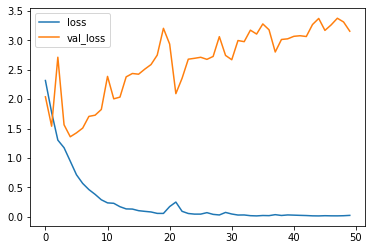

In [8]:
# 그래프
plt.figure(facecolor="white")
plt.plot(fit_hist.history['loss'], label='loss')
plt.plot(fit_hist.history['val_loss'], label='val_loss')
plt.legend()
plt.savefig('../result/loss_{}_{}.png'.format(score[0],file_name))
plt.show()

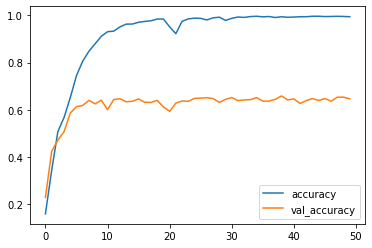

In [9]:
plt.figure(facecolor="white")
plt.plot(fit_hist.history['accuracy'], label='accuracy')
plt.plot(fit_hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.savefig('../result/accuracy_{}_{}.png'.format(score[1],file_name))
plt.show()

In [10]:
# 모델 저장
model.save('./model/{}_{}.h5'.format(score[1],file_name))